# SENTIMENT ANALYSIS (MULTINOMIAL NAIVE BAYES)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


## ENTRENAMIENTO DEL MODELO

In [34]:

### DATA SOURCE ###

URL = "https://raw.githubusercontent.com/ringoquimico/Portfolio/refs/heads/main/Data%20Sources/call_center_data.csv"
URL = pd.read_csv(URL, sep=';', quotechar='"', encoding='utf-8', nrows=10000)


df = pd.DataFrame(URL)
df = df.sample(frac=1).reset_index(drop=True)
df = df[["translated_comments","sentiment_rate"]]

df.head(5)


,translated_comments,sentiment_rate
0,"The chatbot was excellent, they failed to reso...",1
1,I love how the phone resolved my payment issue...,4
2,"The phone was decent, it resolved my payment i...",5
3,"The email answered my loan query, but it was m...",3
4,"I waited days for the chatbot, but they ignore...",2


In [35]:
### RECLASIFICACIÓN DE SENTIMIENTOS Y VECTORIZACIÓN ###   

def reclasificar_sentimiento(valor):
    if valor <= 2:
        return "Negativo"
    elif valor == 3:
        return "Neutral"
    else:
        return "Positivo"

# Aplicar la reclasificación
df['s'] = df['sentiment_rate'].apply(reclasificar_sentimiento)

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, ngram_range=(1,10), tokenizer=token.tokenize)
text_counts = cv.fit_transform(df['translated_comments'])

df.head(10)


c:\Users\joey_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,translated_comments,sentiment_rate,s
0,"The chatbot was excellent, they failed to reso...",1,Negativo
1,I love how the phone resolved my payment issue...,4,Positivo
2,"The phone was decent, it resolved my payment i...",5,Positivo
3,"The email answered my loan query, but it was m...",3,Neutral
4,"I waited days for the chatbot, but they ignore...",2,Negativo
5,"The email was average, it fixed my login probl...",5,Positivo
6,"The email handled my loan query perfectly, gre...",4,Positivo
7,"The email handled my login problem quickly, I’...",5,Positivo
8,"The phone was excellent, it answered my card i...",4,Positivo
9,The chatbot ignored my payment issue completel...,1,Negativo


In [36]:
### ENTRENAMIENTO DEL MODELO ###


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['s'], test_size=0.2, random_state=42
)

# Create and train the MultinomialNB classifier
clf = MultinomialNB().fit(X_train, y_train)

# Make predictions
predicted = clf.predict(X_test)

# Print the accuracy score
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))



MultinomialNB Accuracy: 1.0


<Figure size 1000x600 with 0 Axes>

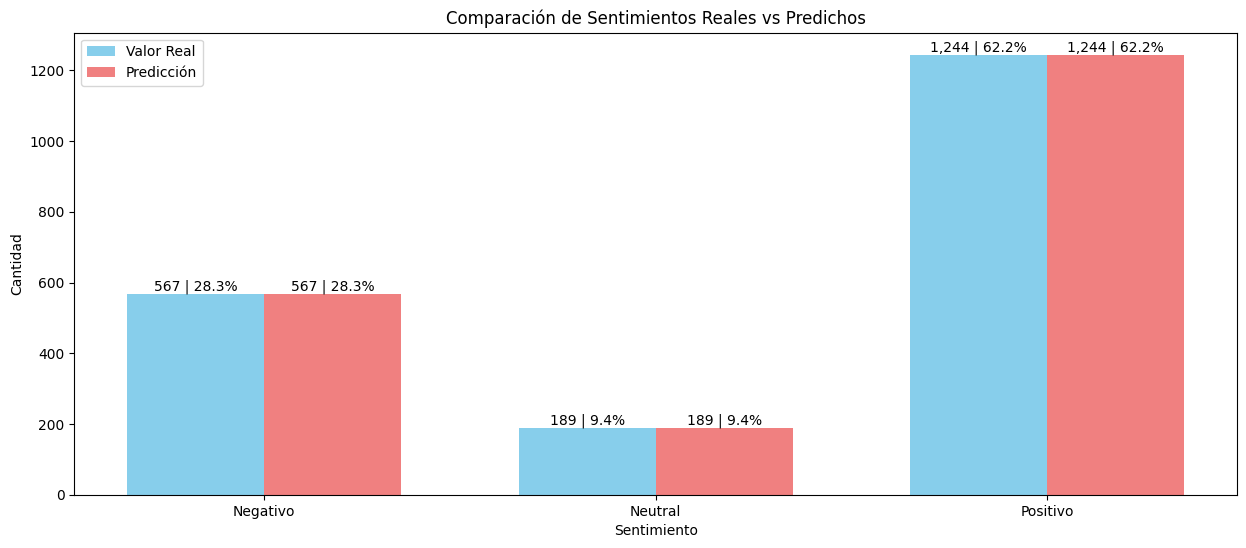


Comparación de predicciones vs valores reales:
     Valor Real Predicción
6252   Positivo   Positivo
4684   Positivo   Positivo
1731   Positivo   Positivo
4742   Positivo   Positivo
4521    Neutral    Neutral
...         ...        ...
6412   Negativo   Negativo
8285    Neutral    Neutral
7853   Positivo   Positivo
1095   Negativo   Negativo
6929   Positivo   Positivo

[2000 rows x 2 columns]


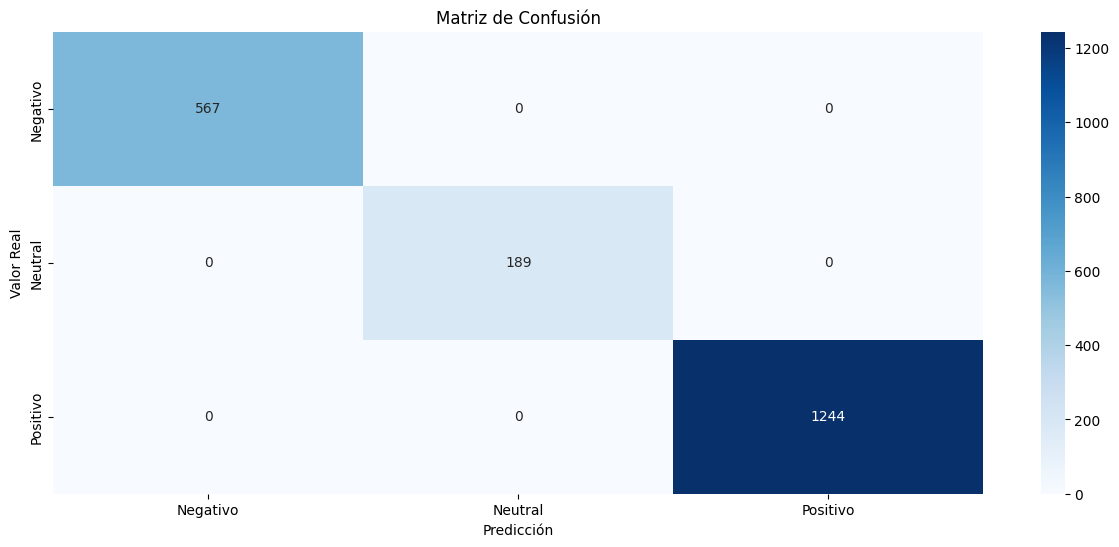

In [37]:
### VISUALIZACIÓN DE RESULTADOS ###

# Create a DataFrame with the comparison
comparison_df = pd.DataFrame({
    'Valor Real': y_test,
    'Predicción': predicted
})

# Create bar chart comparing real vs predicted
plt.figure(figsize=(10, 6))
real_counts = pd.Series(y_test).value_counts().sort_index()
pred_counts = pd.Series(predicted).value_counts().sort_index()

# Calculate percentages
real_percentages = (real_counts / real_counts.sum()) * 100
pred_percentages = (pred_counts / pred_counts.sum()) * 100

x = np.arange(len(real_counts))
width = 0.35

# Define sentiment labels
sentiment_labels = ['Negativo', 'Neutral', 'Positivo']
plt.figure(figsize=(15, 6))
# Create bars
bars1 = plt.bar(x - width/2, real_counts, width, label='Valor Real', color='skyblue')
bars2 = plt.bar(x + width/2, pred_counts, width, label='Predicción', color='lightcoral')

# Add percentage labels on top of each bar
for bars in [bars1, bars2]:
    for idx, rect in enumerate(bars):
        height = rect.get_height()
        percentage = real_percentages[idx] if bars == bars1 else pred_percentages[idx]
        count = real_counts[idx] if bars == bars1 else pred_counts[idx]
        plt.text(rect.get_x() + rect.get_width()/2., height,
                f'{count:,.0f} | {percentage:.1f}%',
                ha='center', va='bottom')

plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.title('Comparación de Sentimientos Reales vs Predichos')
plt.xticks(x, sentiment_labels)
plt.legend()
plt.show()

# Display the comparison DataFrame
print("\nComparación de predicciones vs valores reales:")
print(comparison_df)

# Optional: Create a confusion matrix visualization
plt.figure(figsize=(15, 6))
confusion_matrix = pd.crosstab(comparison_df['Valor Real'], comparison_df['Predicción'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

### SIMULACIÓN DE DATA DE PRODUCCIÓN

In [38]:
URL = "https://raw.githubusercontent.com/ringoquimico/Portfolio/refs/heads/main/Data%20Sources/call_center_data.csv"
URL = pd.read_csv(URL, sep=';', quotechar='"', encoding='utf-8')


prod_df = pd.DataFrame(URL)
prod_df = prod_df[["translated_comments","sentiment"]]


In [39]:
### PREDICCIÓN DE SENTIMIENTOS EN PRODUCCIÓN ###

# Vectorizar los comentarios de producción utilizando el vectorizador 'cv'
production_text_counts = cv.transform(prod_df['translated_comments'])

# Realizar predicciones utilizando el modelo 'clf'
production_predictions = clf.predict(production_text_counts)

# Agregar las predicciones al dataframe original
prod_df['predicted_sentiment'] = production_predictions

prod_df.head(20)



,translated_comments,sentiment,predicted_sentiment
0,The phone answered my balance inquiry smoothly...,positive,Positivo
1,"The email was average, it handled my login pro...",positive,Positivo
2,"The chatbot was excellent, it addressed my bal...",positive,Positivo
3,"Email support fixed my login problem smoothly,...",positive,Positivo
4,"The chatbot addressed my balance inquiry, but ...",neutral,Neutral
5,"The chatbot was amazing, answered my card issu...",neutral,Neutral
6,"The email messed up my login problem terribly,...",negative,Negativo
7,"The email answered my payment issue smoothly, ...",positive,Positivo
8,"I waited forever for the phone, but they ignor...",negative,Negativo
9,"The phone handled my balance inquiry quickly, ...",positive,Positivo


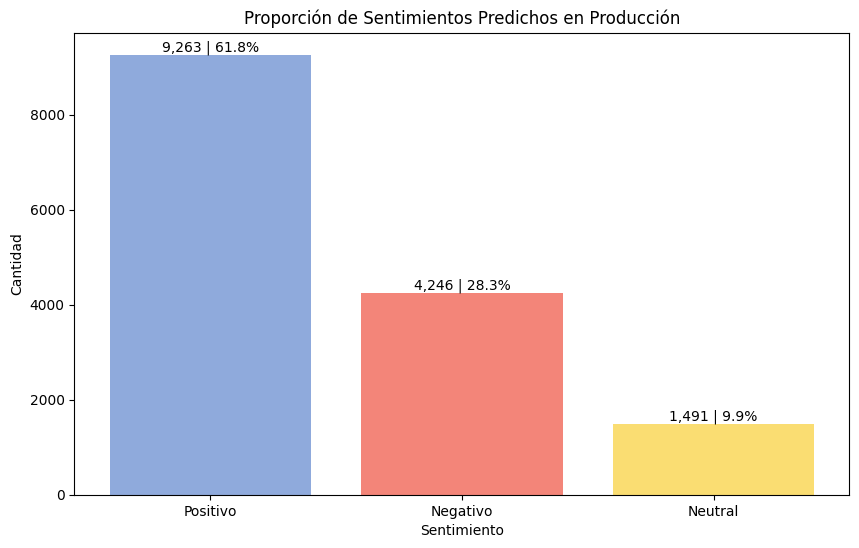

In [40]:

### VISUALIZACIÓN DE RESULTADOS EN PRODUCCIÓN ###

# Definir colores para cada sentimiento
sentiment_colors = {
    'Positivo': '#8FAADC',
    'Neutral': '#FADD72',
    'Negativo': '#F38579'
}

# Crear un gráfico de barras para las proporciones de sentimientos
plt.figure(figsize=(10, 6))
# Calculate the counts of each predicted sentiment
production_sentiment_counts = prod_df['predicted_sentiment'].value_counts()

# Create the bar plot
production_bars = plt.bar(
    production_sentiment_counts.index,
    production_sentiment_counts,
    color=[sentiment_colors[sentiment] for sentiment in production_sentiment_counts.index]
)

# Add percentage labels on top of each bar
for rect in production_bars:
    height = rect.get_height()
    percentage = (height / production_sentiment_counts.sum()) * 100
    plt.text(rect.get_x() + rect.get_width()/2., height,
             f'{height:,.0f} | {percentage:.1f}%',
             ha='center', va='bottom')

plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.title('Proporción de Sentimientos Predichos en Producción')
plt.xticks(production_sentiment_counts.index, production_sentiment_counts.index)
plt.show()


